In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [30]:
data = pd.read_csv('../data/all_variants_annotated_merged.csv')

In [31]:
data

,simplified.significance,AA.wt,pos,AA.mut,year,foldx.ddg,covar.2d,Allele.Frequency,cb.nbr.cat,Allele.Count,genomic.locus,inheritance,disease.cat,protein,variant,AC.gnomAD
0,pathogenic,R,303,C,2018.0,1.156203,0.656840,0.000020,buried,1,22-40757536-C-T,AR,metabolic,ADSL,ADSL_R303C,5
1,pathogenic,R,426,H,2018.0,1.100152,0.840247,0.000199,buried,1,22-40760969-G-A,AR,metabolic,ADSL,ADSL_R426H,49
2,pathogenic,K,246,E,2017.0,8.890600,0.520974,0.000025,buried,1,22-40756440-A-G,AR,metabolic,ADSL,ADSL_K246E,7
3,benign,K,147,M,2019.0,-0.419810,0.287928,0.004325,buried,1,22-40750289-A-T,AR,metabolic,ADSL,ADSL_K147M,1199
4,pathogenic,A,2,V,2012.0,NaN,NaN,0.000115,NaN,1,22-40742567-C-T,AR,metabolic,ADSL,ADSL_A2V,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,gnomAD,V,84,M,2017.0,1.928160,0.663212,0.000004,buried,1,3-10183781-G-A,AD,cancer,VHL,VHL_V84M,1
8486,1/10k,R,200,W,2017.0,-0.942926,0.960276,0.000209,exposed,58,3-10191605-C-T,AD,cancer,VHL,VHL_R200W,58
8487,1/10k,P,25,L,2017.0,NaN,0.040587,0.002996,NaN,507,3-10183605-C-T,AD,cancer,VHL,VHL_P25L,507
8488,1/10k,P,40,L,2017.0,NaN,0.260363,0.000248,NaN,45,3-10183650-C-T,AD,cancer,VHL,VHL_P40L,45


In [137]:
for mutation in data['simplified.significance'].unique():
    print(mutation.center(30, '='))
    for numeric_variable in ['foldx.ddg', 'covar.2d', 'Allele.Frequency', 'Allele.Count', 'AC.gnomAD']:
        var = numeric_variable
        t = data.loc[(data['simplified.significance'] == mutation)][var]
        sub_data = data.loc[(data['simplified.significance'] == mutation) & (data[var].isna())]
        nas = sub_data[var]
        mean = np.nanmean(t)
        std = np.nanstd(t)
        count = nas.isna().sum()
        if count > 0:
            correct = np.random.normal(mean, std, count)
            data.loc[(data['simplified.significance'] == mutation) & (data[var].isna())][var] = correct
#             print(correct)
#             sns.distplot(correct)

==========pathogenic==========
4      NaN
281    NaN
293    NaN
567    NaN
584    NaN
        ..
7808   NaN
7809   NaN
7813   NaN
7829   NaN
7859   NaN
Name: foldx.ddg, Length: 71, dtype: float64
4      NaN
281    NaN
293    NaN
567    NaN
584    NaN
        ..
7808   NaN
7809   NaN
7813   NaN
7829   NaN
7859   NaN
Name: foldx.ddg, Length: 71, dtype: float64
============benign============
483    NaN
484    NaN
485    NaN
486    NaN
487    NaN
        ..
7860   NaN
7861   NaN
8170   NaN
8291   NaN
8304   NaN
Name: foldx.ddg, Length: 276, dtype: float64
483    NaN
484    NaN
485    NaN
486    NaN
487    NaN
        ..
7860   NaN
7861   NaN
8170   NaN
8291   NaN
8304   NaN
Name: foldx.ddg, Length: 276, dtype: float64
============gnomAD============
23     NaN
24     NaN
25     NaN
27     NaN
28     NaN
        ..
8463   NaN
8464   NaN
8472   NaN
8476   NaN
8481   NaN
Name: foldx.ddg, Length: 2870, dtype: float64
23     NaN
24     NaN
25     NaN
27     NaN
28     NaN
        ..
8463   NaN
8

/home/matheus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
data

,simplified.significance,AA.wt,pos,AA.mut,year,foldx.ddg,covar.2d,Allele.Frequency,cb.nbr.cat,Allele.Count,genomic.locus,inheritance,disease.cat,protein,variant,AC.gnomAD
0,pathogenic,R,303,C,2018.0,1.156203,0.656840,0.000020,buried,1,22-40757536-C-T,AR,metabolic,ADSL,ADSL_R303C,5
1,pathogenic,R,426,H,2018.0,1.100152,0.840247,0.000199,buried,1,22-40760969-G-A,AR,metabolic,ADSL,ADSL_R426H,49
2,pathogenic,K,246,E,2017.0,8.890600,0.520974,0.000025,buried,1,22-40756440-A-G,AR,metabolic,ADSL,ADSL_K246E,7
3,benign,K,147,M,2019.0,-0.419810,0.287928,0.004325,buried,1,22-40750289-A-T,AR,metabolic,ADSL,ADSL_K147M,1199
4,pathogenic,A,2,V,2012.0,NaN,NaN,0.000115,NaN,1,22-40742567-C-T,AR,metabolic,ADSL,ADSL_A2V,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8485,gnomAD,V,84,M,2017.0,1.928160,0.663212,0.000004,buried,1,3-10183781-G-A,AD,cancer,VHL,VHL_V84M,1
8486,1/10k,R,200,W,2017.0,-0.942926,0.960276,0.000209,exposed,58,3-10191605-C-T,AD,cancer,VHL,VHL_R200W,58
8487,1/10k,P,25,L,2017.0,NaN,0.040587,0.002996,NaN,507,3-10183605-C-T,AD,cancer,VHL,VHL_P25L,507
8488,1/10k,P,40,L,2017.0,NaN,0.260363,0.000248,NaN,45,3-10183650-C-T,AD,cancer,VHL,VHL_P40L,45


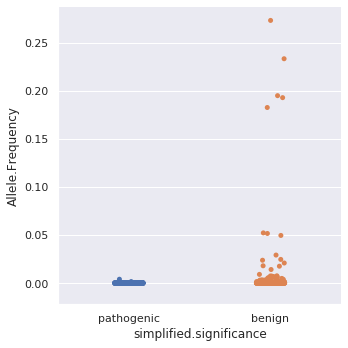

In [56]:
sns.catplot(data=data[(data['simplified.significance'] == 'pathogenic') | (data['simplified.significance'] == 'benign')], x='simplified.significance' , y='Allele.Frequency')

In [93]:
patho = data[data['simplified.significance'] == 'pathogenic']['foldx.ddg']
bening = a = data[data['simplified.significance'] == 'benign']['foldx.ddg']
c = data['Allele.Frequency']

In [58]:
c.isna().sum()

0

In [33]:
a.isna().sum()

71

In [34]:
np.nanmean(a)

3.7049625994615387

In [35]:
np.nanstd(a)

3.3173849672555074

In [51]:
b = np.random.normal(np.nanmean(a), np.nanstd(a), 5000)

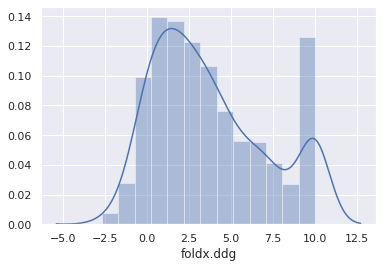

In [37]:
sns.distplot(a)

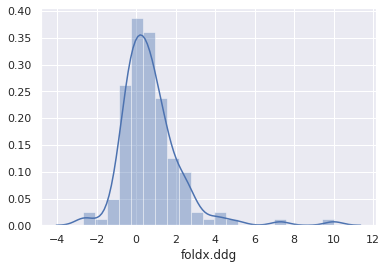

In [94]:
sns.distplot(bening)

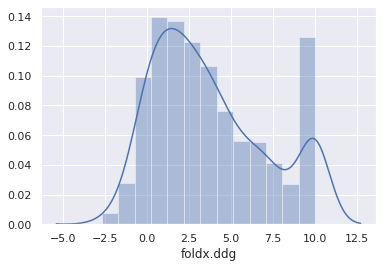

In [95]:
sns.distplot(patho)

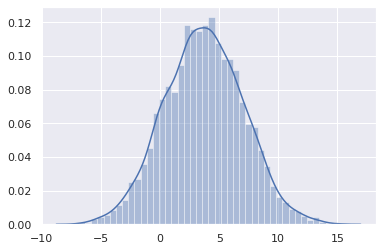

In [52]:
sns.distplot(b)

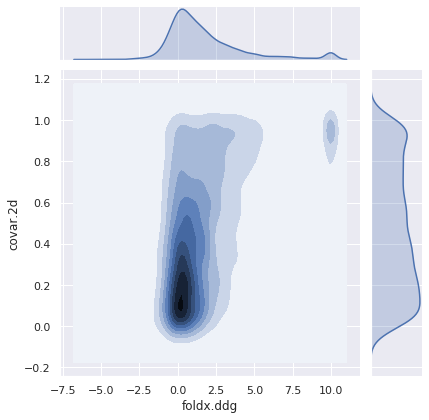

In [40]:
sns.jointplot(x="foldx.ddg", y="covar.2d", data=data, kind="kde");

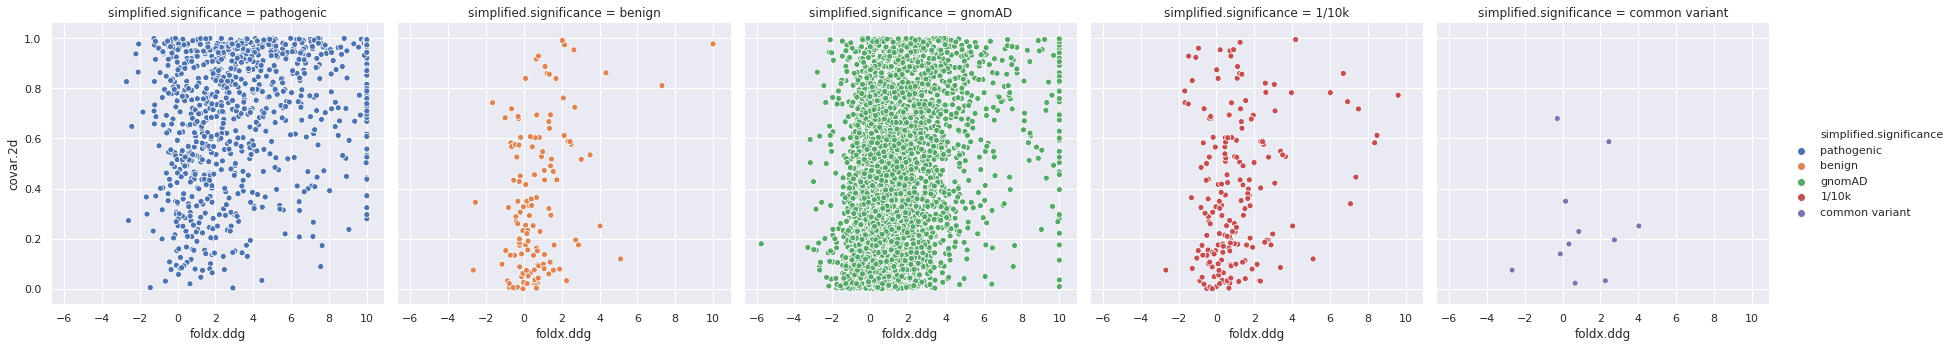

In [47]:
sns.relplot(x='foldx.ddg', y='covar.2d', hue='simplified.significance', col='simplified.significance', data=data);

In [83]:
data[data['simplified.significance'] == 'pathogenic']['simplified.significance'].count()

981

In [90]:
    
for mutation_type in data['simplified.significance'].unique():
    print(mutation_type.center(30, '='))
    print()
    total = data[data['simplified.significance'] == f'{mutation_type}']['simplified.significance'].count()
    print(f'Total of {mutation_type}:', total)
    
    for numeric_variable in ['foldx.ddg', 'covar.2d', 'Allele.Frequency', 'Allele.Count', 'AC.gnomAD']:
        
        nas = data[data['simplified.significance'] == f'{mutation_type}'][numeric_variable].isna().sum()
        perc = round(((nas / total) * 100), 2)
        print(f'[{numeric_variable}]', f'NAs: {nas}', f', percent: {perc}%' )
    
    print()

==========pathogenic==========

Total of pathogenic: 981
[foldx.ddg] NAs: 71 , percent: 7.24%
[covar.2d] NAs: 21 , percent: 2.14%
[Allele.Frequency] NAs: 0 , percent: 0.0%
[Allele.Count] NAs: 0 , percent: 0.0%
[AC.gnomAD] NAs: 0 , percent: 0.0%

============benign============

Total of benign: 409
[foldx.ddg] NAs: 276 , percent: 67.48%
[covar.2d] NAs: 210 , percent: 51.34%
[Allele.Frequency] NAs: 0 , percent: 0.0%
[Allele.Count] NAs: 0 , percent: 0.0%
[AC.gnomAD] NAs: 0 , percent: 0.0%

============gnomAD============

Total of gnomAD: 6716
[foldx.ddg] NAs: 2870 , percent: 42.73%
[covar.2d] NAs: 1985 , percent: 29.56%
[Allele.Frequency] NAs: 0 , percent: 0.0%
[Allele.Count] NAs: 0 , percent: 0.0%
[AC.gnomAD] NAs: 0 , percent: 0.0%

============1/10k=============

Total of 1/10k: 358
[foldx.ddg] NAs: 170 , percent: 47.49%
[covar.2d] NAs: 121 , percent: 33.8%
[Allele.Frequency] NAs: 0 , percent: 0.0%
[Allele.Count] NAs: 0 , percent: 0.0%
[AC.gnomAD] NAs: 0 , percent: 0.0%

========common 